<h1> Librerias Necesarias </h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


Función para calcular y graficar matriz de confusión

In [2]:
def confusion_matrix_graf(y_true, y_pred, dataset = 'Train'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred),
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(dataset + " Confusion Matrix")


Función para calcular métricas de rendimiento de los modelos entrenados

In [11]:
def metrics_train_test(y_train_true,y_train_pred,y_test_true, y_test_pred, time_train, time_pred, model_clf = 'DT'):
        # auc curve
        train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_true, y_train_pred)
        test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test_true, y_test_pred)

        # Scores of train dataset
        train_auc = metrics.auc(train_fpr, train_tpr)
        train_acc = metrics.accuracy_score(y_train_true, y_train_pred)
        train_precision = metrics.precision_score(y_train_true, y_train_pred)
        train_precision_avg = metrics.precision_score(y_train_true, y_train_pred, average='macro')
        train_recall = metrics.recall_score(y_train_true, y_train_pred)
        train_recall_avg = metrics.recall_score(y_train_true, y_train_pred, average='macro')
        train_f1 = metrics.f1_score(y_train_true, y_train_pred)
        train_f1_avg = metrics.f1_score(y_train_true, y_train_pred, average='macro')

        # Scores of test dataset
        test_auc = metrics.auc(test_fpr, test_tpr)
        test_acc = metrics.accuracy_score(y_test_true, y_test_pred)
        test_precision = metrics.precision_score(y_test_true, y_test_pred)
        test_precision_avg = metrics.precision_score(y_test_true, y_test_pred, average='macro')
        test_recall = metrics.recall_score(y_test_true, y_test_pred)
        test_recall_avg = metrics.recall_score(y_test_true, y_test_pred, average='macro')
        test_f1 = metrics.f1_score(y_test_true, y_test_pred)
        test_f1_avg = metrics.f1_score(y_test_true, y_test_pred, average='macro')

        col = ['DataSet','Model','AUC','ACC','Precision','Precision_avg', 'recall', 'recall_avg', 'f1','f1_avg','Time (s)']
        data = [['Train', model_clf, train_auc, train_acc,train_precision,train_precision_avg,train_recall,train_recall_avg,train_f1,train_f1_avg,time_train],
                ['Test', model_clf, test_auc, test_acc,test_precision,test_precision_avg,test_recall,test_recall_avg,test_f1,test_f1_avg,time_pred]]
        df_metrics = pd.DataFrame(data, columns = col)

        # Plot AUC curve
        plt.figure()
        plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
        plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid()
        plt.title("Train Curve ROC")
        plt.legend()
        plt.show()

        return df_metrics

<h1> Cargando base de datos de entrenamiento y prueba estandarizados </h1>

In [4]:
# Datos de entrenamiento y prueba
x_train, y_train = pickle.load(open('final_train_all_stand.pkl', 'rb'))
x_test, y_test = pickle.load(open('final_test_all_stand.pkl', 'rb'))

<h1> Árboles de decisión </h1>

In [6]:
# Entrenamiento del modelo
start = time.time()
model = DecisionTreeClassifier(max_depth = 5, min_samples_split=2, random_state=0).fit(x_train,y_train)
end_train = time.time()
# Predición del modelo
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


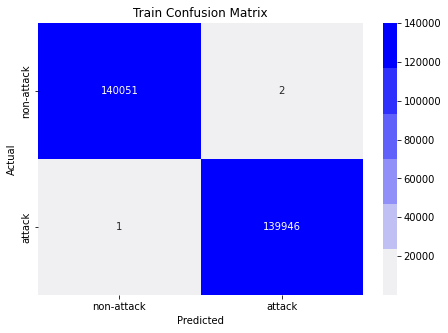

In [7]:
confusion_matrix_graf(y_train,y_train_pred,'Train')

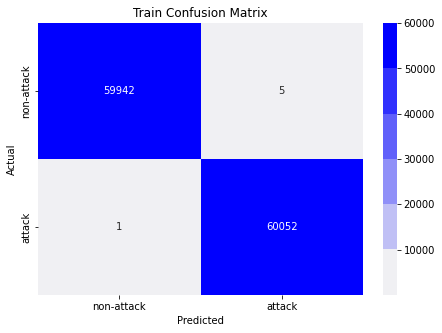

In [8]:
confusion_matrix_graf(y_test,y_test_pred,'Train')

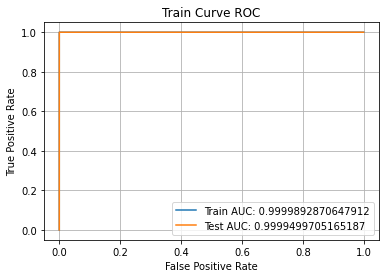

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,0.999989,0.999989,0.999986,0.999989,0.999993,0.999989,0.999989,0.999989,1.537320
1,Test,DT,0.999950,0.999950,0.999917,0.999950,0.999983,0.999950,0.999950,0.999950,0.022167


In [12]:
metrics_AD = metrics_train_test(y_train,y_train_pred,y_test, y_test_pred,end_train-start,end_predict-end_train,'DT')
metrics_AD

Búsqueda de parámetros 

In [13]:
clf = DecisionTreeClassifier(random_state=0)
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.3s
[CV 2/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.3s
[CV 3/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.3s
[CV 1/3] END max_depth=8, min_samples_split=4; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.2s
[CV 2/3] END max_depth=

In [15]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  DecisionTreeClassifier(max_depth=8, random_state=0)
Mejores parámetros:  {'max_depth': 8, 'min_samples_split': 2}
Mejor puntuación (accuracy): 0.9999857142346936


Entrenamiento del mejor modelo

In [16]:
# Entrenamiento del modelo
start = time.time()
model = DecisionTreeClassifier(max_depth = 8, min_samples_split=2, random_state=0).fit(x_train,y_train)
end_train = time.time()
# Predicción
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


In [17]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [18]:
# Saving the Model to disk
pickle.dump(model, open('model_clf_DT.pkl', 'wb'))

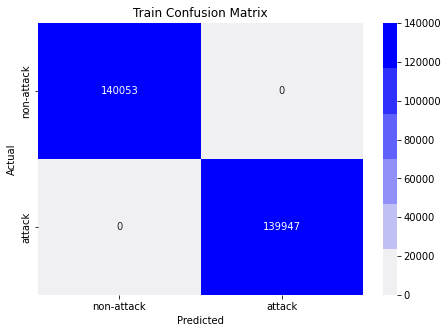

In [19]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')

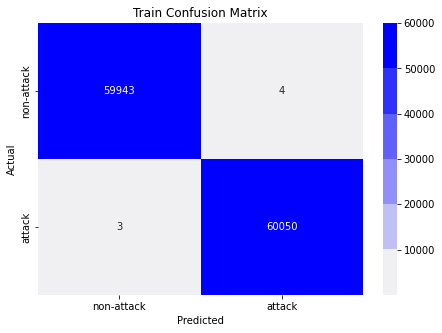

In [20]:
confusion_matrix_graf(y_test, y_test_pred, 'Train')

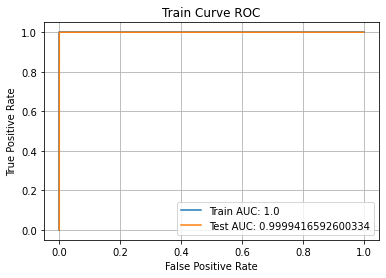

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.862926
1,Test,DT,0.999942,0.999942,0.999933,0.999942,0.99995,0.999942,0.999942,0.999942,0.031881


In [21]:
df_metrics = metrics_train_test(y_train, y_train_pred, y_test, y_test_pred,end_train-start,end_predict-end_train,'DT')
df_metrics

In [22]:
df_metrics.to_csv('./df_metrics.csv',index = False)

<h1> Bosques aleatorios </h1>

In [23]:
clf = RandomForestClassifier(random_state=0)
param = {'n_estimators':[100, 200, 300],
         'max_depth':[20, 22, 24]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  28.6s
[CV 2/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  33.4s
[CV 3/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  31.9s
[CV 1/3] END max_depth=20, n_estimators=200; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  56.0s
[CV 2/3] END max_depth=20, n_est

In [24]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  RandomForestClassifier(max_depth=20, random_state=0)
Mejores parámetros:  {'max_depth': 20, 'n_estimators': 100}
Mejor puntuación (accuracy): 0.9999892856760203


In [25]:
# Entrenamiento del modelo
start = time.time()
model = RandomForestClassifier(random_state=0, n_estimators = 100,  max_depth = 20).fit(x_train,y_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


In [26]:
# Saving the Model to disk
pickle.dump(model, open('model_clf_RF.pkl', 'wb'))
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

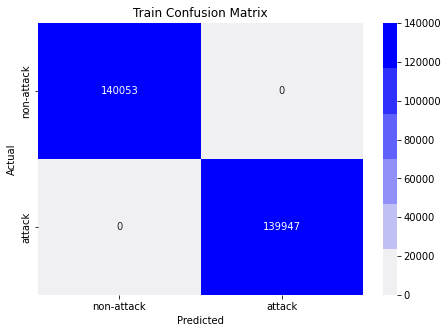

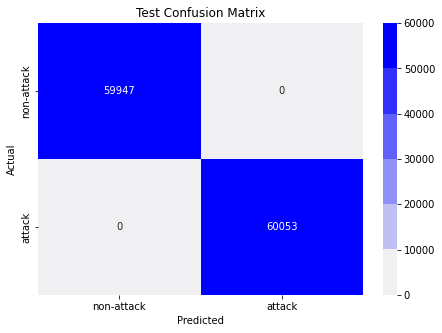

In [27]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')

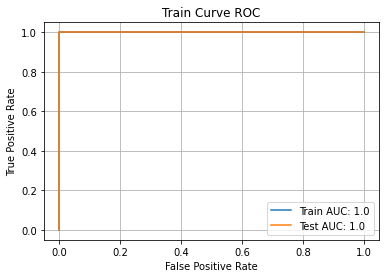

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.862926
1,Test,DT,0.999942,0.999942,0.999933,0.999942,0.99995,0.999942,0.999942,0.999942,0.031881
2,Train,RF,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,41.207861
3,Test,RF,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.188077


In [28]:
df_metrics = pd.read_csv('df_metrics.csv')
df_metrics = pd.concat([df_metrics,metrics_train_test(y_train, y_train_pred, y_test, y_test_pred,end_train-start,end_predict-end_train,'RF')],ignore_index = True)
df_metrics

In [29]:
df_metrics.to_csv('./df_metrics.csv',index = False)

<h1> Vectores de soporte C </h1>

In [30]:
clf = SVC(random_state=123)
param = {'kernel':['linear', 'poly', 'sigmoid', 'rbf'],
         'C':[100, 10, 1, 0.1]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END C=100, kernel=linear; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   6.7s
[CV 2/3] END C=100, kernel=linear; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   4.9s
[CV 3/3] END C=100, kernel=linear; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   4.8s
[CV 1/3] END C=100, kernel=poly; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   3.2s
[CV 2/3] END C=100, kernel=poly; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   3.1s
[CV 3/3] END C=100, kernel=poly; acc: (test=1.000) auc: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   4.0s
[CV 1/3] END C=100, kernel=sigmoi

In [31]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SVC(C=10, kernel='poly', random_state=123)
Mejores parámetros:  {'C': 10, 'kernel': 'poly'}
Mejor puntuación (accuracy): 0.9999535714923455


In [32]:
# Entrenamiento del modelo
start = time.time()
model = SVC(random_state=123, kernel = 'poly', C = 10).fit(x_train,y_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


In [33]:
# Saving the Model to disk
pickle.dump(model, open('model_clf_SVM.pkl', 'wb'))
model.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

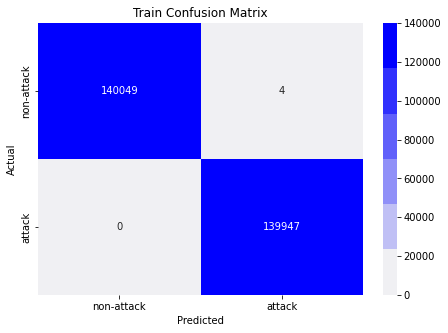

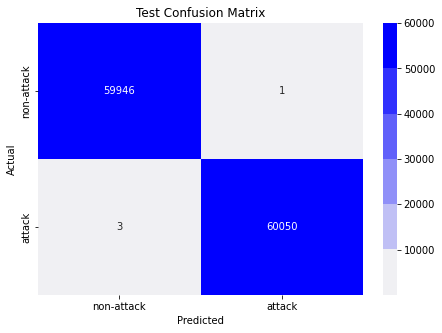

In [34]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')

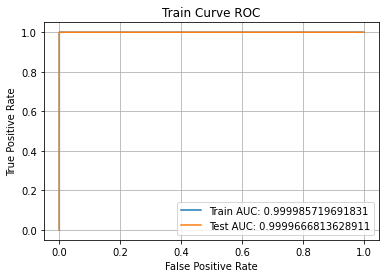

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.862926
1,Test,DT,0.999942,0.999942,0.999933,0.999942,0.99995,0.999942,0.999942,0.999942,0.031881
2,Train,RF,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,41.207861
3,Test,RF,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.188077
4,Train,SVM,0.999986,0.999986,0.999971,0.999986,1.00000,0.999986,0.999986,0.999986,7.303117
5,Test,SVM,0.999967,0.999967,0.999983,0.999967,0.99995,0.999967,0.999967,0.999967,0.735153


In [35]:
df_metrics = pd.read_csv('df_metrics.csv')
df_metrics = pd.concat([df_metrics,metrics_train_test(y_train, y_train_pred, y_test, y_test_pred,end_train-start,end_predict-end_train,'SVM')],ignore_index = True)
df_metrics

In [36]:
df_metrics.to_csv('./df_metrics.csv',index = False)

<h1> Regresión logística </h1>

In [37]:
clf = SGDClassifier(loss='log_loss', random_state=0)
param = {'alpha':np.logspace(-6, 1, 8),
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-06, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   2.1s
[CV 2/3] END alpha=1e-06, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.5s
[CV 3/3] END alpha=1e-06, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   1.3s
[CV 1/3] END alpha=1e-06, penalty=l1; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   7.0s
[CV 2/3] END alpha=1e-06, penalty=l1; acc: (train=1.000, te

c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=1.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=1.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=1.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s
[CV 1/3] END alpha=10.0, penalty=l2; acc: (train=0.842, test=0.843) auc: (train=1.000, test=0.999) f1: (train=0.813, test=0.813) precision: (train=0.999, test=0.999) recall: (train=0.685, test=0.685) total time=   0.6s
[CV 2/3] END alpha=10.0, penalty=l2; acc: (train=0.861, test=0.861) auc: (train=0.999, test=1.000) f1: (train=0.839, test=0.838) precision: (train=0.999, test=0.999) recall: (train=0.723, test=0.721) total time=   0.6s
[CV 3/3] END alpha=10.0, penalty=l2; acc: (train=0.578, test=0.579) auc: (train=1.000, test=0.999) f1: (train=0.270, test=0.274) precision: (train=0.997, test=0.997) recall: (train=0.156, test=0.159) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.9s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.4s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.9s


In [38]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(alpha=1e-05, loss='log_loss', random_state=0)
Mejores parámetros:  {'alpha': 1e-05, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.9999107143877525


In [39]:
# Entrenamiento del modelo
start = time.time()
model = SGDClassifier(loss='log_loss', random_state=0, alpha = 1e-05, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


In [40]:
# Saving the Model to disk
pickle.dump(model, open('model_clf_LR.pkl', 'wb'))
model.get_params()

{'alpha': 1e-05,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

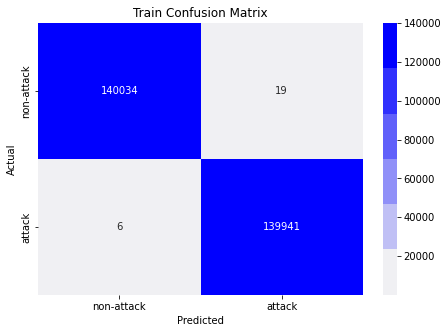

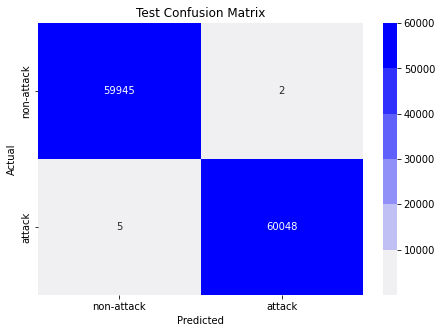

In [41]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')

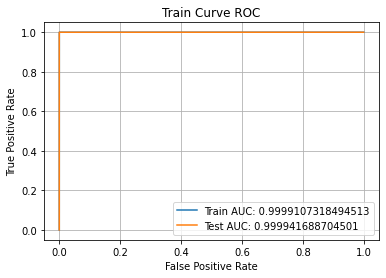

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.862926
1,Test,DT,0.999942,0.999942,0.999933,0.999942,0.999950,0.999942,0.999942,0.999942,0.031881
2,Train,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.207861
3,Test,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.188077
4,Train,SVM,0.999986,0.999986,0.999971,0.999986,1.000000,0.999986,0.999986,0.999986,7.303117
5,Test,SVM,0.999967,0.999967,0.999983,0.999967,0.999950,0.999967,0.999967,0.999967,0.735153
6,Train,LR,0.999911,0.999911,0.999864,0.999911,0.999957,0.999911,0.999911,0.999911,1.050134
7,Test,LR,0.999942,0.999942,0.999967,0.999942,0.999917,0.999942,0.999942,0.999942,0.011969


In [42]:
df_metrics = pd.read_csv('df_metrics.csv')
df_metrics = pd.concat([df_metrics,metrics_train_test(y_train, y_train_pred, y_test, y_test_pred,end_train-start,end_predict-end_train,'LR')],ignore_index = True)
df_metrics

In [43]:
df_metrics.to_csv('./df_metrics.csv',index = False)

<h1> Máquina vectorial de soporte lineal </h1>

In [44]:
clf = SGDClassifier(loss='hinge', random_state=0)
param = {'alpha':[10**x for x in range(-5,3)],
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   0.9s
[CV 2/3] END alpha=1e-05, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   0.8s
[CV 3/3] END alpha=1e-05, penalty=l2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=   0.9s
[CV 1/3] END alpha=1e-05, penalty=l1; acc: (train=0.999, test=0.999) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) precision: (train=0.999, test=0.999) recall: (train=1.000, test=1.000) total time=   1.6s
[CV 2/3] END alpha=1e-05, penalty=l1; acc: (train=1.000, te

c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=1, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=1, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=1, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s
[CV 1/3] END alpha=10, penalty=l2; acc: (train=0.814, test=0.813) auc: (train=1.000, test=0.999) f1: (train=0.772, test=0.771) precision: (train=0.999, test=0.999) recall: (train=0.629, test=0.627) total time=   0.5s
[CV 2/3] END alpha=10, penalty=l2; acc: (train=0.805, test=0.805) auc: (train=0.999, test=1.000) f1: (train=0.757, test=0.758) precision: (train=0.999, test=0.999) recall: (train=0.610, test=0.610) total time=   0.6s
[CV 3/3] END alpha=10, penalty=l2; acc: (train=0.530, test=0.530) auc: (train=1.000, test=0.999) f1: (train=0.112, test=0.112) precision: (train=0.993, test=0.992) recall: (train=0.060, test=0.059) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=1.000, test=0.999) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.999, test=1.000) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.5s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=1.000, test=0.999) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.6s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s


c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.7s


In [45]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(alpha=1e-05, random_state=0)
Mejores parámetros:  {'alpha': 1e-05, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.9998714289923422


In [46]:
# Entrenamiento del modelo
start = time.time()
model = SGDClassifier(loss='hinge', random_state=0, alpha = 1e-05, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)


In [47]:
# Saving the Model to disk
pickle.dump(model, open('model_clf_SVM_Linear.pkl', 'wb'))
model.get_params()

{'alpha': 1e-05,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

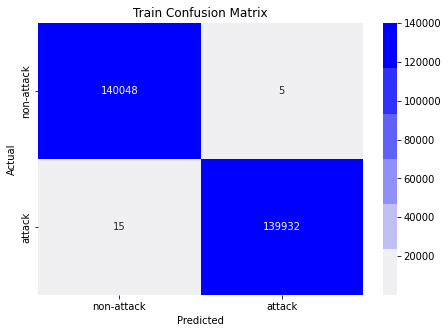

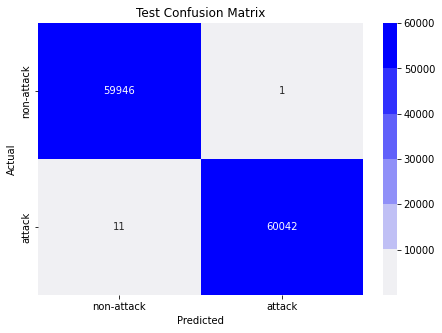

In [48]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')

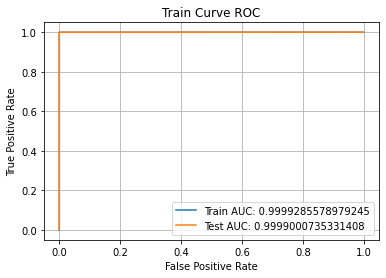

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg,Time (s)
0,Train,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.862926
1,Test,DT,0.999942,0.999942,0.999933,0.999942,0.999950,0.999942,0.999942,0.999942,0.031881
2,Train,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.207861
3,Test,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.188077
4,Train,SVM,0.999986,0.999986,0.999971,0.999986,1.000000,0.999986,0.999986,0.999986,7.303117
5,Test,SVM,0.999967,0.999967,0.999983,0.999967,0.999950,0.999967,0.999967,0.999967,0.735153
6,Train,LR,0.999911,0.999911,0.999864,0.999911,0.999957,0.999911,0.999911,0.999911,1.050134
7,Test,LR,0.999942,0.999942,0.999967,0.999942,0.999917,0.999942,0.999942,0.999942,0.011969
8,Train,SVM_Linear,0.999929,0.999929,0.999964,0.999929,0.999893,0.999929,0.999929,0.999929,0.726112
9,Test,SVM_Linear,0.999900,0.999900,0.999983,0.999900,0.999817,0.999900,0.999900,0.999900,0.014399


In [49]:
df_metrics = pd.read_csv('df_metrics.csv')
df_metrics = pd.concat([df_metrics,metrics_train_test(y_train, y_train_pred, y_test, y_test_pred, end_train-start,end_predict-end_train,'SVM_Linear')],ignore_index = True)
df_metrics

In [50]:
df_metrics.to_csv('./df_metrics.csv',index = False)